# Part 8 -- Transformations

Transformations using Singular Value Decomposition (SVD) and tSNE

**Load lib codes**

In [1]:
from os import chdir
chdir('/home/jovyan/work/Analyzing_Unstructured_Data_for_Finance/Analyzing_Unstructured_Data_for_Finance/')

from lib import *
# suppress_warnings()

**Pick a larger number of n_components for SVD to see how many we want to use in our final pipeline**<br>
Scroll down to the pipeline and edit n_components based on this information. 

In [2]:
from sklearn.decomposition import TruncatedSVD

In [3]:
X_tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.X_tfidf')

In [4]:
SVD = TruncatedSVD(n_components=300, random_state=42)
SVD_tfidf = SVD.fit_transform(X_tfidf)

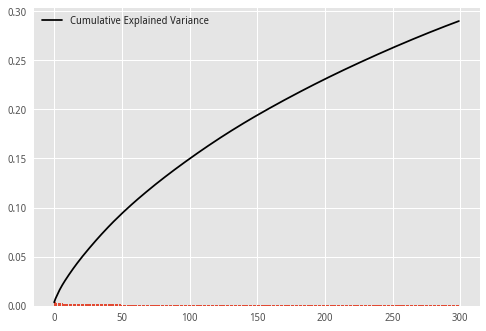

In [5]:
x = list(range(len(SVD.explained_variance_ratio_)))
plt.plot(x, np.cumsum(SVD.explained_variance_ratio_), label='Cumulative Explained Variance', color='black')
plt.bar(x, SVD.explained_variance_ratio_)
plt.legend()
# plt.ylim(0,.05)

In [6]:
np.cumsum(SVD.explained_variance_ratio_)[290:]

array([ 0.28526018,  0.28578796,  0.28631388,  0.28683868,  0.28736114,
        0.28788143,  0.28840018,  0.28891821,  0.28943174,  0.28994198])

With 100 SVD n_components, we can only account for 6% of the variance in the data. We need more.
With 300 SVD n_components, we can only account for 11% of the variance in the data.<br><br>
**Go back and clean data to see if we can capture more variance**<br>
Went back to clean data (picked better Twitter accounts) and we got a better score, with 300 SVD n_components accounting for 29% of the variance in the data.

**Run transformed data into tSNE**

In [7]:
!pip install bhtsne

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
import bhtsne

In [14]:
from bhtsne import tsne

In [15]:
start = datetime.now()

TSNE_SVD_tfidf = tsne(SVD_tfidf)

end = datetime.now()
print(end - start)

1:01:12.457939


In [16]:
joblib.dump(TSNE_SVD_tfidf, '../Analyzing_Unstructured_Data_for_Finance/data/8.TSNE_SVD_tfidf.pickle')

['../Analyzing_Unstructured_Data_for_Finance/data/8.TSNE_SVD_tfidf.pickle']

In [17]:
joblib.dump(SVD_tfidf, '../Analyzing_Unstructured_Data_for_Finance/data/8.SVD_tfidf.pickle')

['../Analyzing_Unstructured_Data_for_Finance/data/8.SVD_tfidf.pickle']